In [9]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
from skimage import color

In [10]:
#convert 48 bit pepper.png to 24 bit
im_48 = Image.open('peppers.png')
im_mnm = Image.open('mandm.png')
num_color_shade = 2 ** 24
im_24 = im_48.convert( palette=Image.ADAPTIVE, colors=num_color_shade)
ds_pep = np.array(im_24)
ds_mnm = np.array(im_mnm)
#im_24.save('24_bit.png')

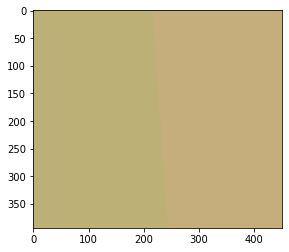

In [18]:
def my_kmeans_pp(ds,k):
    
    lab = color.rgb2lab(ds) #convert rgb to lab
    ax = np.zeros(shape = (lab.shape[0],lab.shape[1],5)) #create empty array with 5 dimension to store l, a, b, x, and y

    #fill ax with l, a, b, x, and y features
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i,j,0] = lab[i,j,0]
            ax[i,j,1] = lab[i,j,1]
            ax[i,j,2] = lab[i,j,2]
            ax[i,j,3] = i;
            ax[i,j,4] = j;
    
    max_iter = 5 # Number of k means iteration
    keys = [] # Keys to access elements in a cluster
    cent = np.zeros((k,ax.shape[2])) # Centroids are stored in variable cent
    cent[0] = random.choice(random.choice(ax))#randomly select first initial centroid
    
    # Applying kmeans ++ centroid initialization algorithm
    for i in range(1,k):
        d = []
        for j in range(ax.shape[0]):
            for l in range(ax.shape[1]):
                dist = []
                for m in range(i):
                    dist.append(np.sum((cent[m]-ax[j,l])**2)) # Find distance of pixel to already calculated centroids
                d.append(np.min(dist))# Find the minimum distance
        prob = d/np.sum(d) # Convert all distance to probabilities
        cp = np.cumsum(prob) # Find cumilative probabilities
        cp = cp.reshape(ax.shape[0],ax.shape[1])
        r = random.random() # Select a random number between 0 and 1
        # Select a point whose probability is just greater than r and assign it as new centroid
        index_x = np.where(cp>r)[0][0]
        index_y = np.where(cp>r)[1][0]
        cent[i] = ax[index_x,index_y]

    for i in range(k):
        keys.append(i)
    # loop 10 times(approximately loop till convergence)
    for iter in range(max_iter):
        cluster = {k: [] for k in keys}
        # find pixels that belong to closest centroid
        for i in range(ax.shape[0]):
            for j in range(ax.shape[1]):
                cp = ax[i,j]
                temp_dist = float('inf')
                counter = 0
                index = 0
                for k in cent:
                    # calculate distance from current point to all centroid
                    dist = np.sum((cp - k) ** 2)
                    if dist < temp_dist:
                        temp_dist = dist
                        index = counter
                    counter = counter + 1
                # Assign point to the cluster
                if iter != max_iter-1:
                    cluster[index].append(cp)
                else:
                    cluster[index].append([i,j])
        c_k = cluster.keys()
        c = 0
        # recompute cluster centroids
        if iter != max_iter-1:
            for i in c_k:
                m = np.mean(cluster[i],axis = 0)
                cent[c] = m
                c += 1
    # Assign color of centroid to all points in same cluster for visual representation
    for i in c_k:
        for j in cluster[i]:
            ax[j[0],j[1]] = cent[i].astype('int')
                
    out_img = color.lab2rgb(ax[:,:,0:3])
    Image.fromarray((out_img*255).astype('uint8')).save('mnm_labxy_pp_2.jpg')
                
    plt.imshow(out_img) #convert lab to rgb and display
        
my_kmeans_pp(ds_mnm,2)